In [533]:
import d2d
import importlib
importlib.reload(d2d)
import numpy as np
import tensorflow as tf
import pandas as pd


In [534]:
linear, lstm_model, dnn_model, df_all_chan,input_columns  = d2d.import_data()

da = df_all_chan.to_numpy()

# chan_mean = da[:,0:2495].flatten().mean()
# chan_std = da[:,0:2495].flatten().std()
# discharge_mean = da[:,2496].flatten().mean()
# discharge_std = da[:,2496].flatten().std()

# da[:,0:2495] = (da[:,0:2495] - chan_mean) / chan_std
# da[:,2496] = (da[:,2496] - discharge_mean) / discharge_std
df_all_chan

Keys: <KeysViewHDF5 ['DAS Data', 'Discharge', 'Times']>


,0,1,2,3,4,5,6,7,8,9,...,2487,2488,2489,2490,2491,2492,2493,2494,2495,Discharge
0,1737.318436,1932.321258,1788.269101,3706.977556,1831.756626,1768.674227,1908.850695,3690.341997,1804.145150,2437.436803,...,3603.932847,2066.070800,2215.669390,1881.772352,3990.883595,1584.965970,1787.281257,1862.912440,4160.545583,9.947179
1,8161.349279,8245.783723,8118.189935,528.834231,468.890511,714.714310,728.051775,158.440806,82.719811,116.949415,...,8238.452283,8204.901437,8194.671705,8228.769841,8211.066134,8229.370787,8218.436955,8210.143402,8178.032001,9.934657
2,8242.942236,8205.640252,8093.980026,510.832905,451.884623,709.510655,709.932307,153.715844,83.404382,116.112236,...,8184.500407,8221.490571,8202.429647,8194.927561,8197.675324,8188.718827,8189.658071,8225.017259,8163.918322,9.929290
3,8159.780047,8196.654224,8113.873839,489.734947,438.657688,690.418208,701.896139,158.058233,83.003254,112.787627,...,8173.860868,8156.187127,8151.113841,8235.843141,8145.360321,8192.392266,8169.275389,8129.926491,8161.652382,9.923923
4,8198.498465,8161.470921,8120.452338,521.425978,444.272741,689.710217,695.164917,160.246640,84.054029,111.125592,...,8198.827286,8234.815465,8219.987333,8140.961605,8193.517740,8157.154485,8241.648596,8229.194191,8234.212679,9.918557
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62740,8250.132344,8239.956853,8120.606117,709.708516,524.745767,837.184738,489.648388,74.456188,99.460249,91.911794,...,8237.995892,8243.180597,8263.685370,8236.631204,8275.920631,8158.055021,8254.067590,8260.170060,8189.577468,9.264333
62741,8305.046581,8215.717055,8123.947165,713.983575,522.460494,877.141941,504.369225,73.276914,98.030764,95.958327,...,8244.600296,8220.651129,8233.808688,8202.925678,8272.382131,8208.732997,8185.700921,8199.439315,8194.036074,9.263708
62742,8233.246034,8212.890322,8126.486773,712.414299,520.468924,892.210041,495.762205,72.542053,97.112611,98.886336,...,8296.184469,8233.850012,8214.919239,8173.153815,8231.181168,8183.252249,8171.110881,8196.319138,8220.779280,9.263083
62743,8230.088927,8237.590610,8188.620285,705.487651,523.552127,904.283215,506.508453,72.315307,96.342666,101.163440,...,8232.138229,8214.366628,8275.731039,8266.643805,8154.573206,8208.317212,8251.329151,8267.316168,8207.721162,9.262458


In [535]:
# test_data_frame = pd.DataFrame({'0':range(0,10000), 'Discharge':range(0,10000)})
# input_columns = ['0']

In [536]:
# print('Number of DAS observations: %d'%df_all_chan.shape[0])
# window_input_width = 200
# print('Number of tf Dataset windows: %d'%np.floor(df_all_chan.shape[0]/window_input_width))

In [537]:


# multi_step_window = d2d.WindowGenerator(test_data_frame,
#     input_width=window_input_width, label_width=1, shift=0,
#     label_columns=['Discharge'],
#     input_columns=input_columns,
#     shuffle=False)
window_input_width = 200
multi_step_window_shuffled = d2d.WindowGenerator(df_all_chan,
    input_width=window_input_width, label_width=1, shift=0,
    label_columns=['Discharge'],
    input_columns=input_columns,
    shuffle=True)

(array([[[-3.54133636e-01,  2.26923034e-01,  1.14726432e-01, ...,
         -1.60057759e+00, -2.55366230e+00, -2.21347380e+00],
        [-1.03894234e+00,  4.55386102e-01, -1.00408375e-01, ...,
         -9.40444946e-01, -2.77585196e+00, -2.30307555e+00],
        [-9.81271490e-02, -1.14181280e+00,  1.28855813e+00, ...,
          4.02015857e-02, -2.83119416e+00, -2.34134126e+00],
        ...,
        [-1.86135876e+00, -2.40507603e+00, -2.17826024e-01, ...,
         -6.04875863e-01,  1.36350071e+00,  1.22449875e+00],
        [-1.32005513e+00, -2.59902692e+00, -1.84142673e+00, ...,
         -3.17226619e-01,  1.09211433e+00,  7.72611558e-01],
        [-1.17455554e+00,  6.49604350e-02,  3.60154241e-01, ...,
         -1.88722253e-01,  2.35443926e+00,  1.88257718e+00]],

       [[ 1.09834760e-01, -7.18906894e-02, -1.51972532e+00, ...,
          1.29976690e+00,  3.46347785e+00,  3.30941439e+00],
        [ 8.41040254e-01,  1.55117905e+00, -8.61516118e-01, ...,
          1.18697906e+00,  3.10104275

In [539]:
# ntest = tf.data.experimental.cardinality(multi_step_window.test)
# nval = multi_step_window.val.cardinality().numpy()
# ntrain = multi_step_window.train.cardinality().numpy()
# print('Size of test ds: %d'%ntest)
# print('Size of val ds: %d'%nval)
# print('Size of train ds: %d'%ntrain)
# print('Sum of ds sizes = %d'%(ntest+nval+ntrain))


In [540]:
history_linear = d2d.compile_and_fit(linear, multi_step_window_shuffled, learning_rate = 0.001)

Epoch 1/100
3/3 [==============================] - 1s 186ms/step - loss: 52181.3867 - mean_absolute_error: 131.8410 - val_loss: 64554.8047 - val_mean_absolute_error: 188.2303
Epoch 2/100
3/3 [==============================] - 0s 173ms/step - loss: 30161.1543 - mean_absolute_error: 120.0878 - val_loss: 22969.1992 - val_mean_absolute_error: 102.3748
Epoch 3/100
3/3 [==============================] - 0s 185ms/step - loss: 21338.1582 - mean_absolute_error: 104.4210 - val_loss: 15508.3984 - val_mean_absolute_error: 82.4205
Epoch 4/100
3/3 [==============================] - 0s 179ms/step - loss: 23157.1230 - mean_absolute_error: 96.5941 - val_loss: 6938.5732 - val_mean_absolute_error: 50.7600
Epoch 5/100
3/3 [==============================] - 0s 166ms/step - loss: 8114.7153 - mean_absolute_error: 47.4247 - val_loss: 13290.1172 - val_mean_absolute_error: 76.5648
Epoch 6/100
3/3 [==============================] - 0s 168ms/step - loss: 7510.9863 - mean_absolute_error: 62.8217 - val_loss: 9792.8

In [541]:
history = d2d.compile_and_fit(lstm_model, multi_step_window_shuffled, learning_rate = 0.001)

Epoch 1/100
3/3 [==============================] - 2s 423ms/step - loss: 4.2230 - mean_absolute_error: 1.6961 - val_loss: 1.1202 - val_mean_absolute_error: 0.7329
Epoch 2/100
3/3 [==============================] - 1s 317ms/step - loss: 0.8928 - mean_absolute_error: 0.6941 - val_loss: 0.6073 - val_mean_absolute_error: 0.6130
Epoch 3/100
3/3 [==============================] - 1s 312ms/step - loss: 0.4607 - mean_absolute_error: 0.5160 - val_loss: 0.4721 - val_mean_absolute_error: 0.5510
Epoch 4/100
3/3 [==============================] - 1s 312ms/step - loss: 0.3399 - mean_absolute_error: 0.4488 - val_loss: 0.4058 - val_mean_absolute_error: 0.5182
Epoch 5/100
3/3 [==============================] - 1s 312ms/step - loss: 0.2746 - mean_absolute_error: 0.3982 - val_loss: 0.3666 - val_mean_absolute_error: 0.4967
Epoch 6/100
3/3 [==============================] - 1s 306ms/step - loss: 0.2314 - mean_absolute_error: 0.3685 - val_loss: 0.3671 - val_mean_absolute_error: 0.4938
Epoch 7/100
3/3 [=====

In [542]:
history_dnn = d2d.compile_and_fit(dnn_model, multi_step_window_shuffled, learning_rate = 0.001)

Epoch 1/100
3/3 [==============================] - 1s 184ms/step - loss: 13.1705 - mean_absolute_error: 2.7965 - val_loss: 14.5428 - val_mean_absolute_error: 2.3194
Epoch 2/100
3/3 [==============================] - 0s 151ms/step - loss: 8.6768 - mean_absolute_error: 2.0914 - val_loss: 9.9314 - val_mean_absolute_error: 2.5619
Epoch 3/100
3/3 [==============================] - 0s 150ms/step - loss: 9.9451 - mean_absolute_error: 2.1776 - val_loss: 11.0175 - val_mean_absolute_error: 2.2047
Epoch 4/100
3/3 [==============================] - 0s 151ms/step - loss: 8.3518 - mean_absolute_error: 2.0705 - val_loss: 6.2952 - val_mean_absolute_error: 1.4780
Epoch 5/100
3/3 [==============================] - 0s 149ms/step - loss: 4.6546 - mean_absolute_error: 1.4952 - val_loss: 2.3991 - val_mean_absolute_error: 1.2244
Epoch 6/100
3/3 [==============================] - 0s 157ms/step - loss: 2.1071 - mean_absolute_error: 1.1492 - val_loss: 2.2667 - val_mean_absolute_error: 1.0832
Epoch 7/100
3/3 [==

In [543]:
val_performance = lstm_model.evaluate(multi_step_window_shuffled.val)
performance = lstm_model.evaluate(multi_step_window_shuffled.test, verbose=0)


1/1 [==============================] - 0s 253ms/step - loss: 0.2539 - mean_absolute_error: 0.3375


In [544]:
val_performance_linear = linear.evaluate(multi_step_window_shuffled.val)
performance_linear = linear.evaluate(multi_step_window_shuffled.test, verbose=0)


1/1 [==============================] - 0s 188ms/step - loss: 2309.4717 - mean_absolute_error: 30.6304


In [545]:
val_performance_dnn = dnn_model.evaluate(multi_step_window_shuffled.val)
performance_dnn = dnn_model.evaluate(multi_step_window_shuffled.test, verbose=0)

1/1 [==============================] - 0s 218ms/step - loss: 0.6042 - mean_absolute_error: 0.3787


In [546]:
import matplotlib.pyplot as plt
plt.figure(figsize = (12,12), dpi = 800)
plt.plot(history_dnn.history['loss'], label='loss')
plt.plot(history_dnn.history['val_loss'], label='val_loss')
plt.grid(True)
plt.legend()
plt.title('Train and Validation Loss Curves')
plt.ylabel('Loss')
plt.xlabel('Epochs')

Text(0.5, 0, 'Epochs')

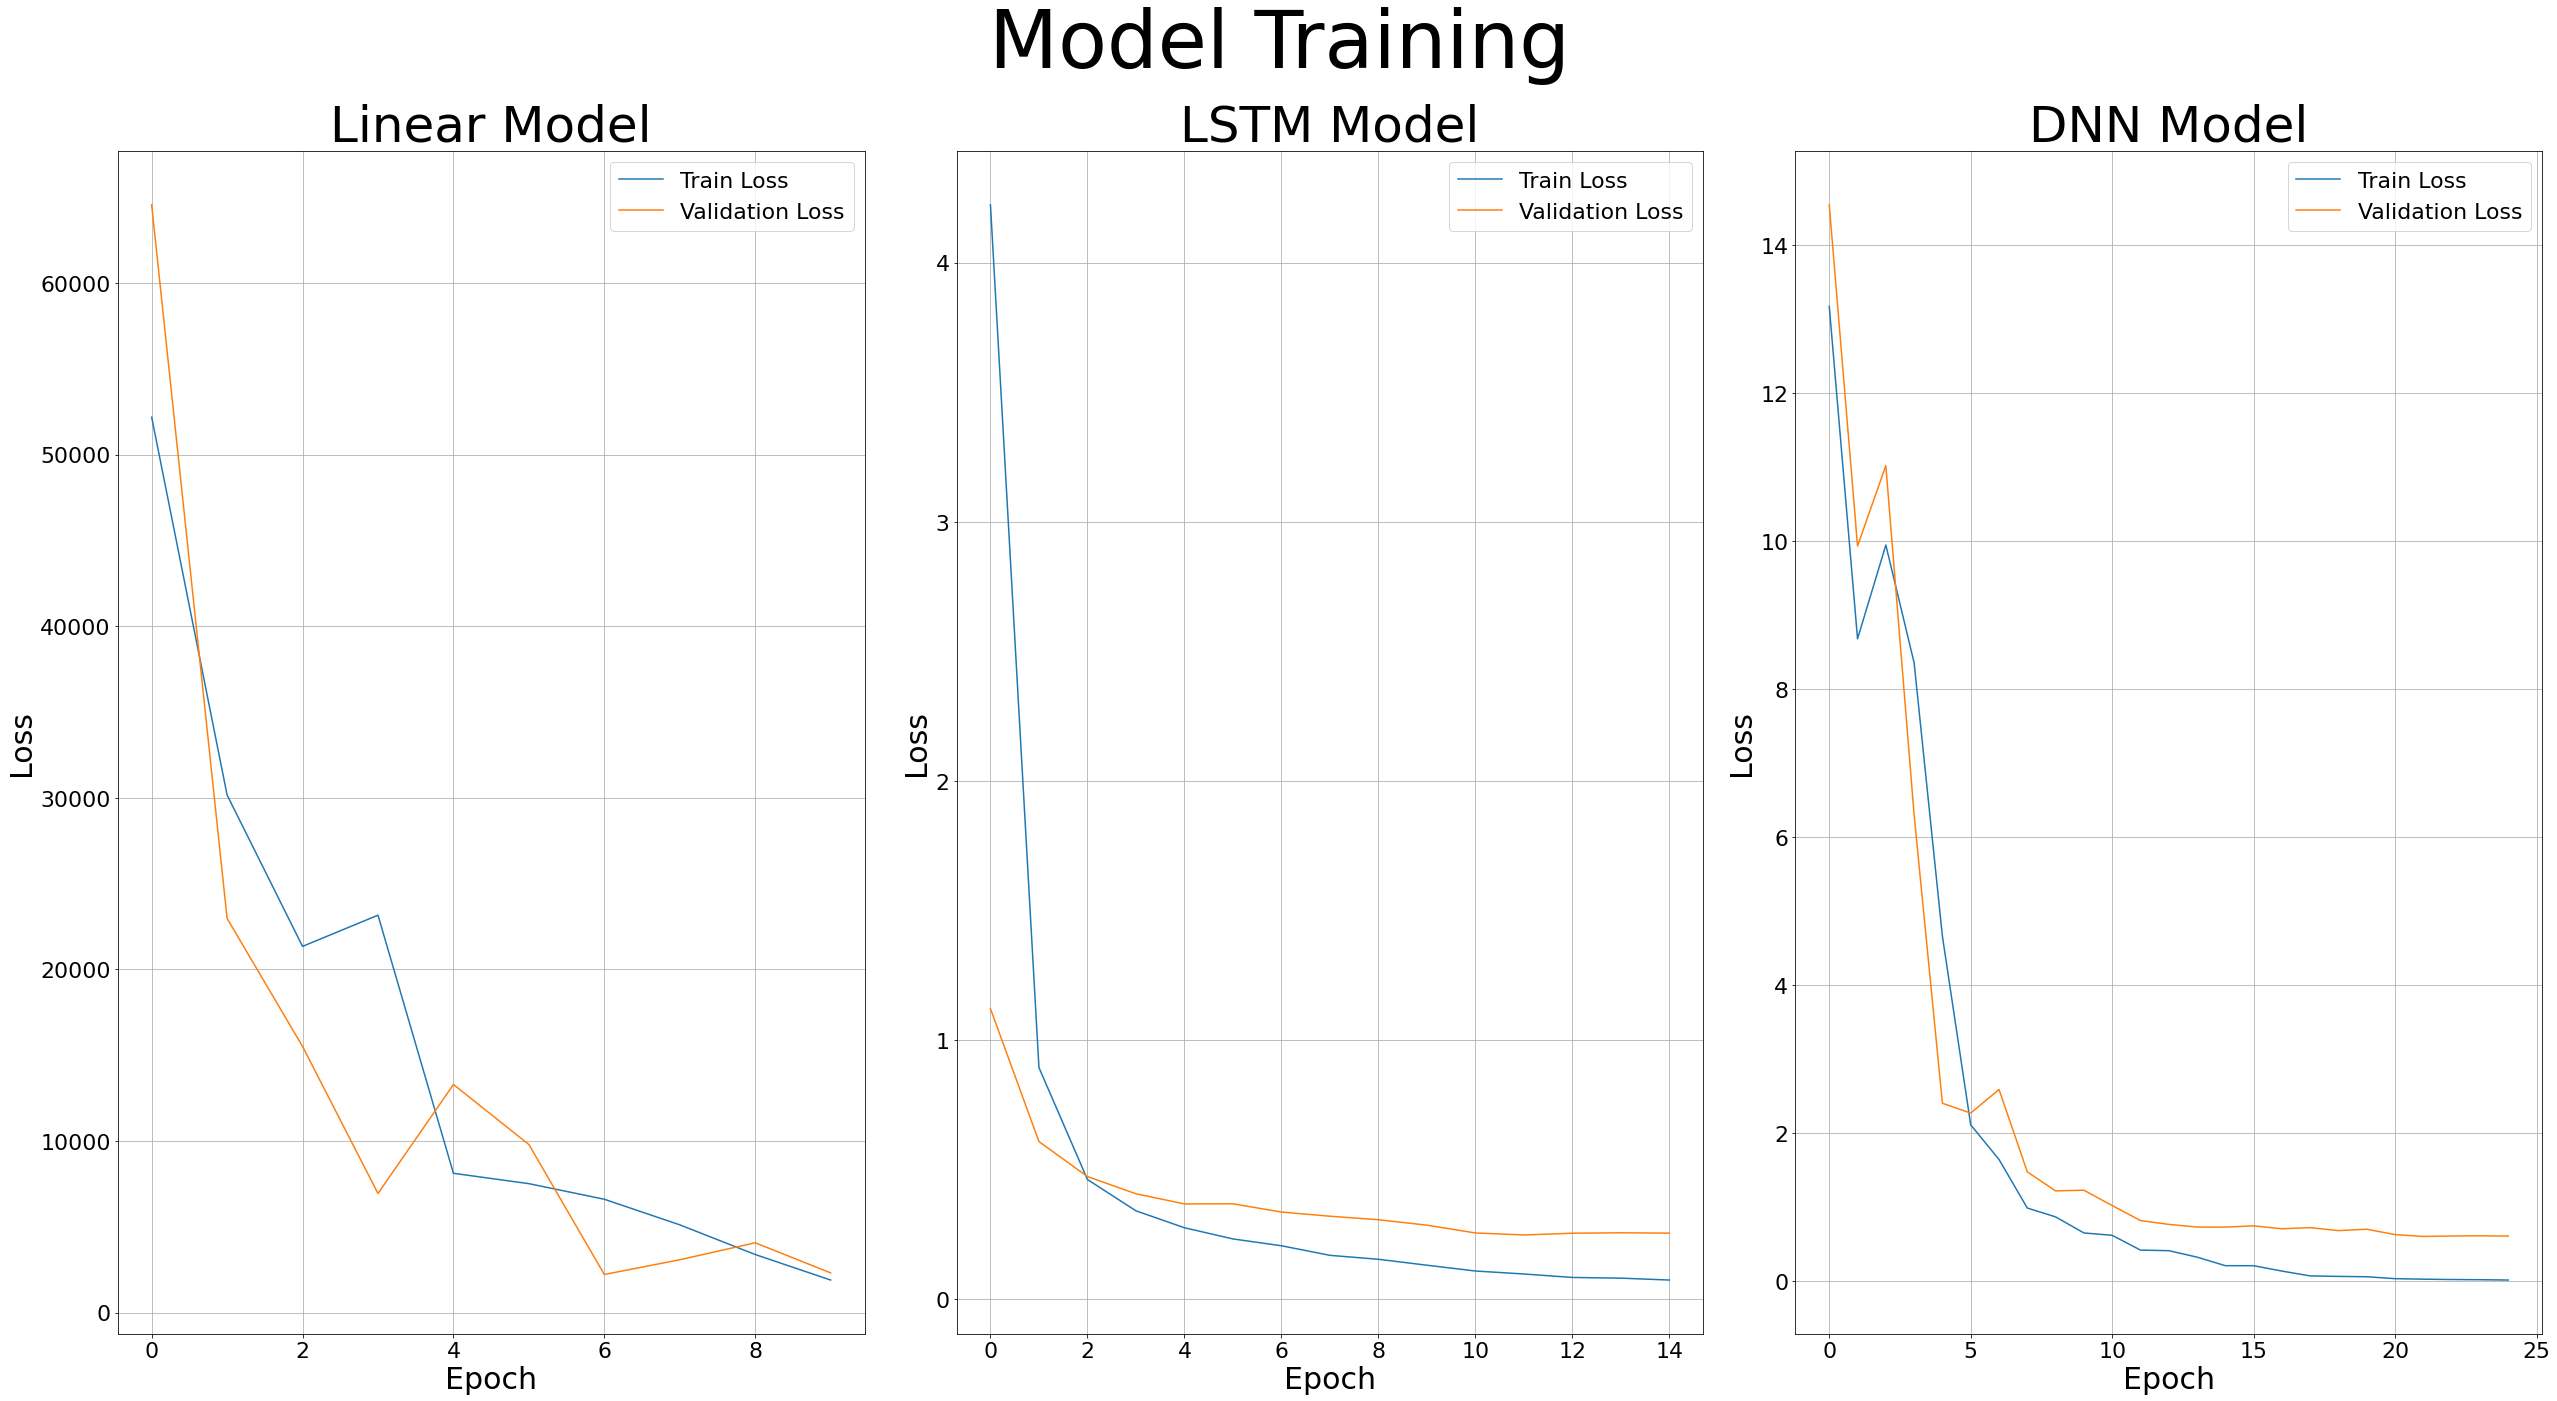

In [547]:
matplotlib.rcParams.update({'font.size': 22})

fig, (ax0, ax1, ax2) = plt.subplots(nrows=1, ncols=3, sharey=False, sharex=False,
                                    figsize=(36,20))

ax0.plot(history_linear.history['loss'], label='Train Loss')
ax0.plot(history_linear.history['val_loss'], label='Validation Loss')
ax0.grid(True)
ax0.legend()
ax0.set_title('Linear Model',size=50)
ax0.set_ylabel('Loss', size=30)
ax0.set_xlabel('Epoch', size=30)

ax1.plot(history.history['loss'], label='Train Loss')
ax1.plot(history.history['val_loss'], label='Validation Loss')
ax1.grid(True)
ax1.legend()
ax1.set_title('LSTM Model', size=50)
ax1.set_ylabel('Loss', size=30)
ax1.set_xlabel('Epoch', size=30)

ax2.plot(history_dnn.history['loss'], label='Train Loss')
ax2.plot(history_dnn.history['val_loss'], label='Validation Loss')
ax2.grid(True)
ax2.legend()
ax2.set_title('DNN Model', size=50)
ax2.set_ylabel('Loss', size=30)
ax2.set_xlabel('Epoch', size=30)

fig.suptitle('Model Training', fontsize = 80)

plt.tight_layout()
plt.show()

In [548]:
multi_step_window_shuffled.test

<TensorSliceDataset shapes: ((57, 200, 2308), (57, 1, 1)), types: (tf.float32, tf.float32)>

In [549]:
test_inputs = []
for element in multi_step_window_shuffled.test.as_numpy_iterator():
    test_inputs.append(element[0])

In [550]:
test_inputs = np.asarray(test_inputs)

In [551]:
test_inputs = test_inputs.squeeze()


In [552]:
test_inputs.shape

(57, 200, 2308)

In [553]:
predictions_lstm = lstm_model.predict(test_inputs)
predictions_linear = linear.predict(test_inputs)
predictions_dnn = dnn_model.predict(test_inputs)

In [554]:
predictions_linear

array([[-7.4205879e+01],
       [-2.1296146e+01],
       [ 2.8652029e+01],
       [ 3.8856111e+00],
       [ 4.5897503e+00],
       [ 1.2157763e+01],
       [-7.6378360e+00],
       [-3.3131363e+01],
       [ 1.9237297e+00],
       [-2.1230098e-02],
       [ 1.8854860e+01],
       [-2.5947920e+01],
       [ 4.0434055e+01],
       [ 4.3335104e+00],
       [ 2.0666080e+00],
       [ 2.5869932e+01],
       [ 4.0050892e+01],
       [ 3.8562856e+00],
       [-1.0506797e+01],
       [-4.8180347e+01],
       [ 1.2815660e+01],
       [-4.0644994e-01],
       [-3.3552811e+01],
       [ 8.7847776e+00],
       [-7.6164217e+00],
       [-3.4420925e+01],
       [-7.1543465e+01],
       [ 3.1042830e+01],
       [ 1.4433405e+01],
       [ 2.4569036e+01],
       [-6.1489964e+00],
       [-2.1595045e+01],
       [ 3.0858461e-02],
       [ 8.8649368e+00],
       [ 2.0657583e+01],
       [ 2.2227182e+01],
       [ 3.1295153e+01],
       [ 8.7369293e-01],
       [ 1.7539927e+01],
       [ 1.7738907e+01],


In [555]:
test_set = []
for element in multi_step_window_shuffled.test.as_numpy_iterator():
    test_set.append(element[1])

In [556]:
test_set = np.asarray(test_set)

In [557]:
test_set = test_set.squeeze()

Text(0, 0.5, 'Observed Discharge')

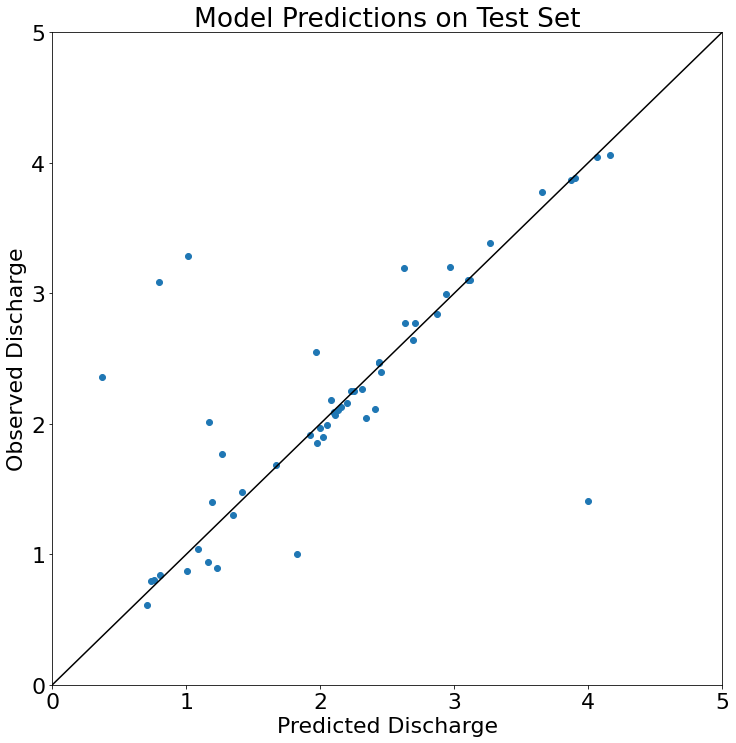

In [558]:

import matplotlib
import matplotlib.pyplot as plt

matplotlib.rcParams.update({'font.size': 22})

plt.figure(figsize = (12,12))
plt.title('Model Predictions on Test Set', )
plt.scatter(predictions_dnn, test_set)
plt.ylim([0,5])
plt.xlim([0,5])
plt.plot([0,5],[0,5], c='black')
plt.xlabel('Predicted Discharge')
plt.ylabel('Observed Discharge')


Text(0, 0.5, 'Observed Discharge')

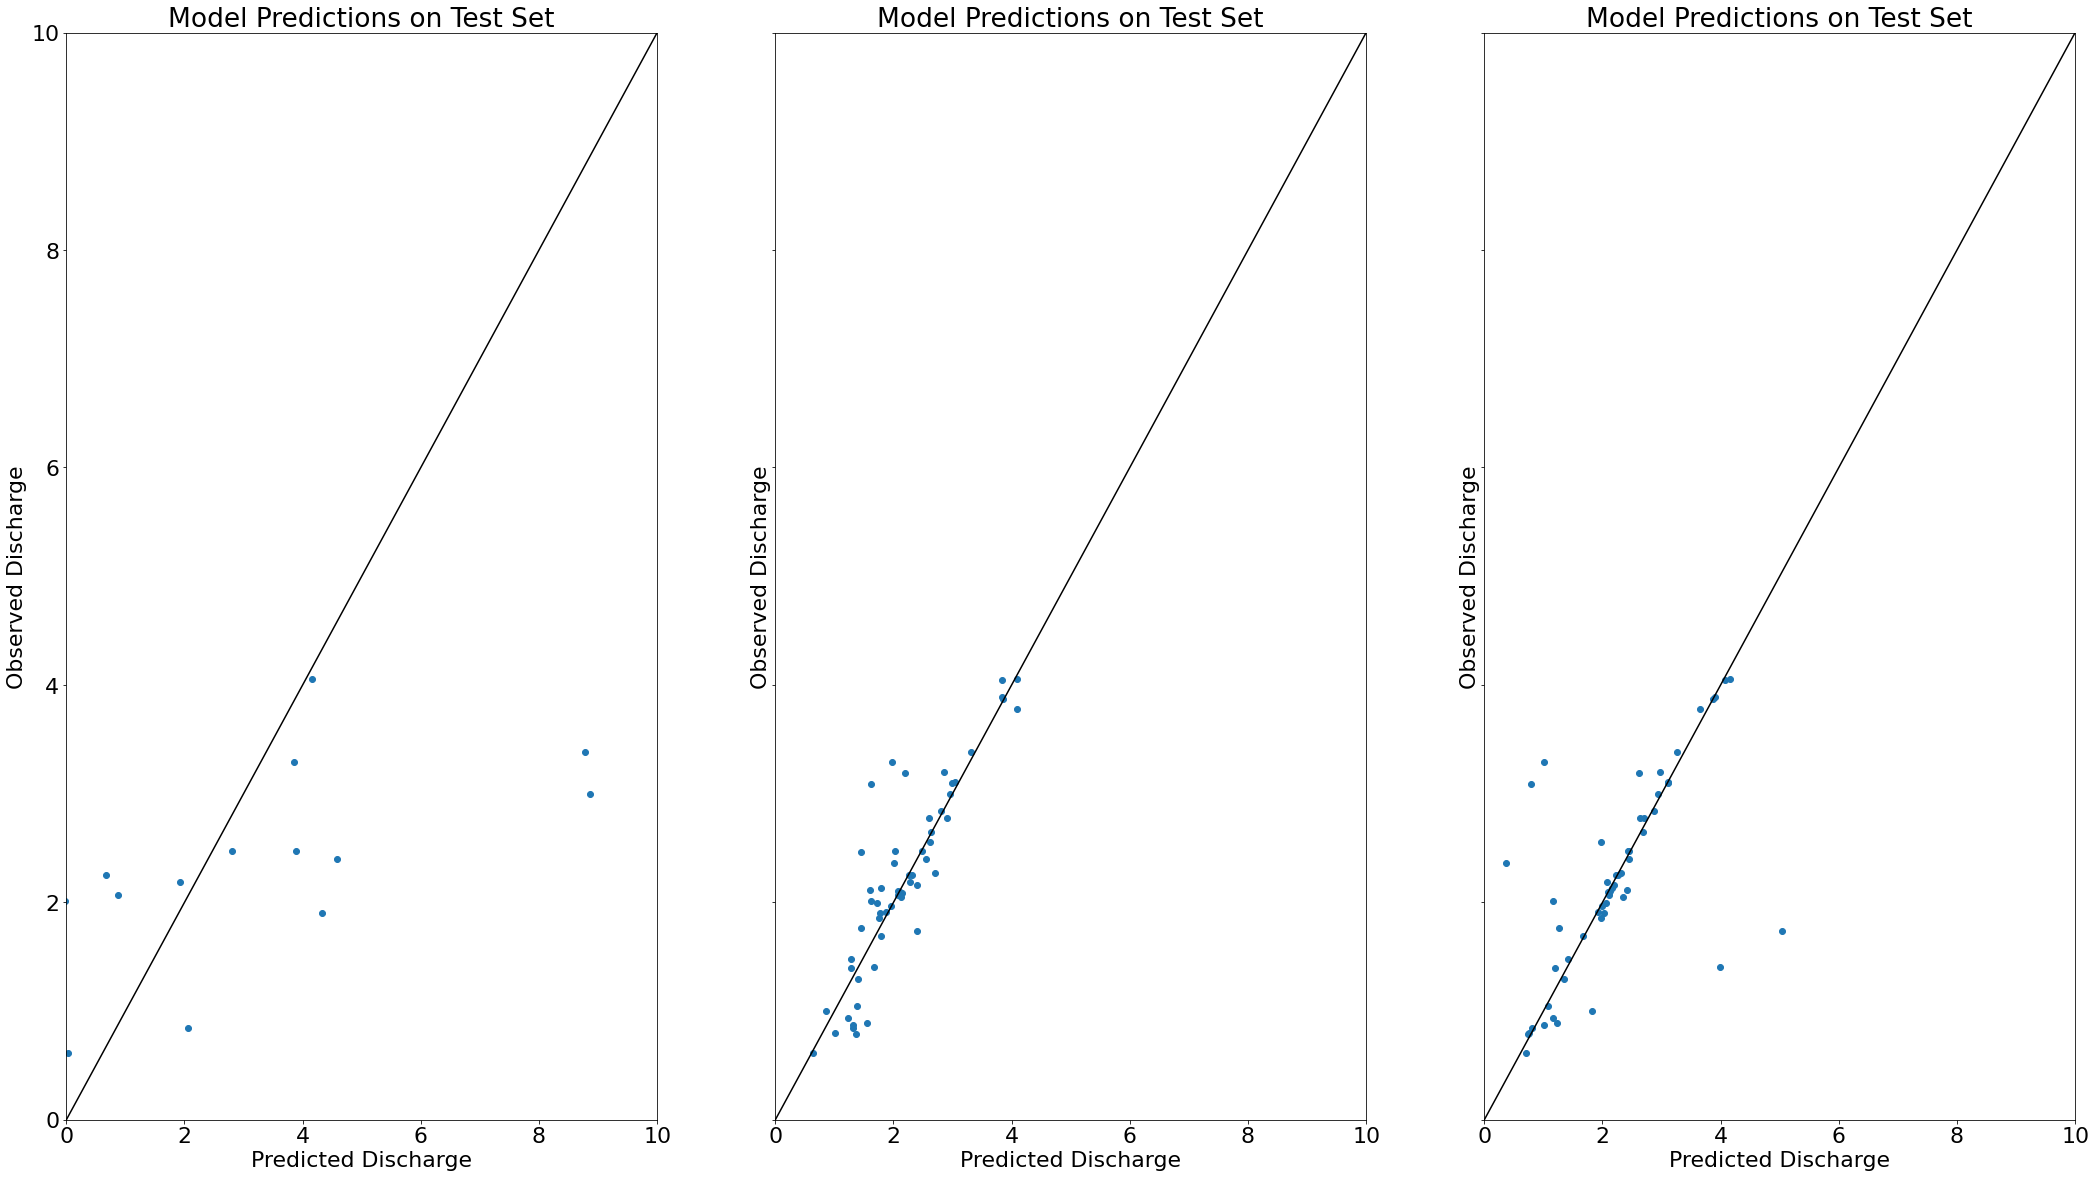

In [559]:
fig, (ax0, ax1, ax2) = plt.subplots(nrows=1, ncols=3, sharey=True, sharex=False,
                                    figsize=(36,20))

ax0.set_title('Model Predictions on Test Set', )
ax0.scatter(predictions_linear, test_set)
ax0.set_ylim([0,10])
ax0.set_xlim([0,10])
ax0.plot([0,10],[0,10], c='black')
ax0.set_xlabel('Predicted Discharge')
ax0.set_ylabel('Observed Discharge')


ax1.set_title('Model Predictions on Test Set', )
ax1.scatter(predictions_lstm, test_set)
ax1.set_ylim([0,10])
ax1.set_xlim([0,10])
ax1.plot([0,10],[0,10], c='black')
ax1.set_xlabel('Predicted Discharge')
ax1.set_ylabel('Observed Discharge')

ax2.set_title('Model Predictions on Test Set', )
ax2.scatter(predictions_dnn, test_set)
ax2.set_ylim([0,10])
ax2.set_xlim([0,10])
ax2.plot([0,10],[0,10], c='black')
ax2.set_xlabel('Predicted Discharge')
ax2.set_ylabel('Observed Discharge')